In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from IPython.display import display

df = pd.read_csv("pcap.csv")
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,18.211.118.21,192.168.1.248,TCP,66,443 > 33100 [ACK] Seq=1 Ack=1 Win=17 Len=0 T...
1,2,0.000465,18.211.118.21,192.168.1.248,TLSv1.2,122,Application Data
2,3,0.433247,149.112.112.112,192.168.1.248,TCP,66,443 > 52906 [ACK] Seq=1 Ack=1 Win=588 Len=0 ...
3,4,0.579567,149.112.112.112,192.168.1.248,TLSv1.2,313,Application Data
4,5,1.048138,208.85.40.20,192.168.1.248,TCP,66,443 > 42740 [ACK] Seq=1 Ack=1 Win=65535 Len=...


##  Histogram

The only categorical variable in this data set is "Length", so let's take a look at it.  The data is skewed to the right in this example.

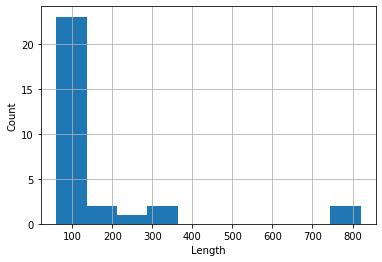

In [58]:
import matplotlib.pyplot as plt

plt.xlabel("Length")
plt.ylabel("Count")
plt = df.Length.hist()

In [59]:
print(f"Number of data points: {len(df)}")

Number of data points: 30


## Median

The software libraries that I am using include built-in functions to make a litany of statistical calculations.  I will demonstrate the procedures with and without these functions in order to shed light on the concepts being learned.

The median is the "middle" value of a **sorted** list of data.  Since there are an even number of entries in my list, I have to take the two center values and divide by two.  Note that in this particular case, the list is indexed from "0".

In [60]:
lengths = df.Length.sort_values().reset_index()
median = (lengths.Length.loc[14] + lengths.Length.loc[15]) / 2
print(f"The median is {median}.")
print("Does my calculation match the built-in library?")
print(f"Is {median} == {df.Length.median()}?  {median == df.Length.median()}!")

The median is 81.5.
Does my calculation match the built-in library?
Is 81.5 == 81.5?  True!


## Mean

In statistics, there are different types of means.  The one used in the book is the aritmetic mean.  This is the "average" we all learned in grade school.  The data I am using represents a population.  I did not use random sampling to collect the values (though random sampling is more useful in my industry).  The mean doesn't require sorting the values.

$$\mu=\frac{\sum X_1 + X_2 + X_3 + X_n}{n}$$

In [61]:
total = 0
for val in df.Length:
    total += val
u = total / len(df)
print(f"The population mean is {u}")
print("Does my calculation match the built-in library?")
print(f"Is {u} == {df.Length.mean()}?  {u == df.Length.mean()}!")

The population mean is 160.56666666666666
Does my calculation match the built-in library?
Is 160.56666666666666 == 160.56666666666666?  True!
